 # Bayesian Statistics With Baseball Data

This is the diachronic interpretation of Bayes' theorem.

Here, the posterior is an update of our prior belief given the data observed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.stats import beta

## Bayesian Analysis of Batting Averages

In [2]:
hits = pd.read_csv('career_hits.csv')

In [3]:
hits.head()

name  hits  at_bat   average
0      Hank Aaron  3771   12364  0.304998
1    Tommie Aaron   216     944  0.228814
2       Andy Abad     2      21  0.095238
3     John Abadie    11      49  0.224490
4  Ed Abbaticchio   772    3044  0.253614

Find the top and bottom three hitters according to their average.

In [4]:
hits.sort_values('average', ascending=False).head(3)

name  hits  at_bat  average
5853   John Mohardt     1       1      1.0
9303      Al Wright     1       1      1.0
359   Jeff Banister     1       1      1.0

In [5]:
hits.sort_values('average', ascending=True).head(3)

name  hits  at_bat  average
1494  Larry Ciaffone     0       5      0.0
7303      Jay Rogers     0       8      0.0
2552     Ferd Eunick     0       2      0.0

Set up a prior distribution to represent our belief about batting average.

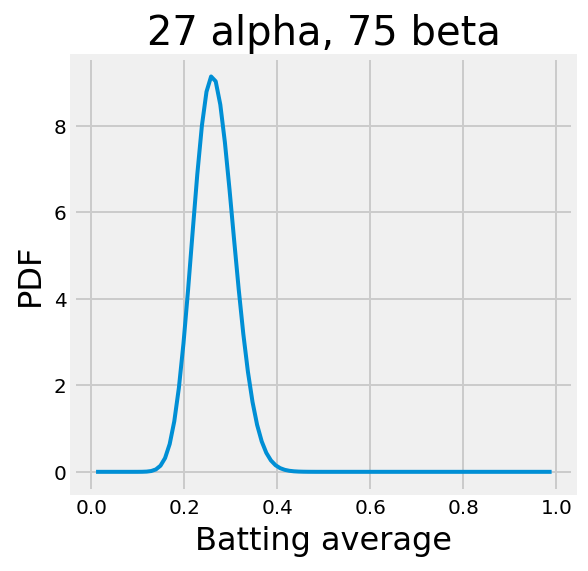

In [6]:
alpha_prior = 27
beta_prior = 75

p = np.linspace(0.01, 0.99, 100)
prior = beta(alpha_prior, beta_prior)

plt.figure(figsize=(4,4))
plt.plot(p, prior.pdf(p), lw=2)
plt.title(str(alpha_prior)+' alpha, '+str(beta_prior)+' beta', fontsize=20)
plt.xlabel('Batting average', fontsize=16)
plt.ylabel('PDF', fontsize=16)
plt.show()

Calculate the maximum a posteriori (MAP) estimate of players' batting averages.

In [7]:
def get_map(row):
    alpha_posterior = row.hits + alpha_prior
    beta_posterior = row.at_bat - row.hits + beta_prior
    return (alpha_posterior-1)/(alpha_posterior+beta_posterior-2)

hits['MAP'] = hits.apply(get_map, axis=1)

Look up the top and bottom batters according to the MAP estimate.

In [8]:
hits.head()

name  hits  at_bat   average       MAP
0      Hank Aaron  3771   12364  0.304998  0.304637
1    Tommie Aaron   216     944  0.228814  0.231801
2       Andy Abad     2      21  0.095238  0.231405
3     John Abadie    11      49  0.224490  0.248322
4  Ed Abbaticchio   772    3044  0.253614  0.253817

In [9]:
hits.sort_values('MAP', ascending=False).head()

name  hits  at_bat   average       MAP
3938        Rogers Hornsby  2930    8173  0.358497  0.357307
4118  Shoeless Joe Jackson  1772    4981  0.355752  0.353867
2109          Ed Delahanty  2596    7505  0.345903  0.344773
3475        Billy Hamilton  2158    6268  0.344288  0.342965
3663        Harry Heilmann  2660    7787  0.341595  0.340560

In [10]:
hits.sort_values('MAP', ascending=True).head()

name  hits  at_bat   average       MAP
4031  John Humphries    52     364  0.142857  0.168103
4322     Mike Jordan    12     125  0.096000  0.168889
2987    Ed Gastfield     6      88  0.068182  0.170213
3113    Buck Gladmon    56     380  0.147368  0.170833
598      Bill Bergen   516    3028  0.170410  0.173274

Plot the MLE batting average against the MAP batting average.

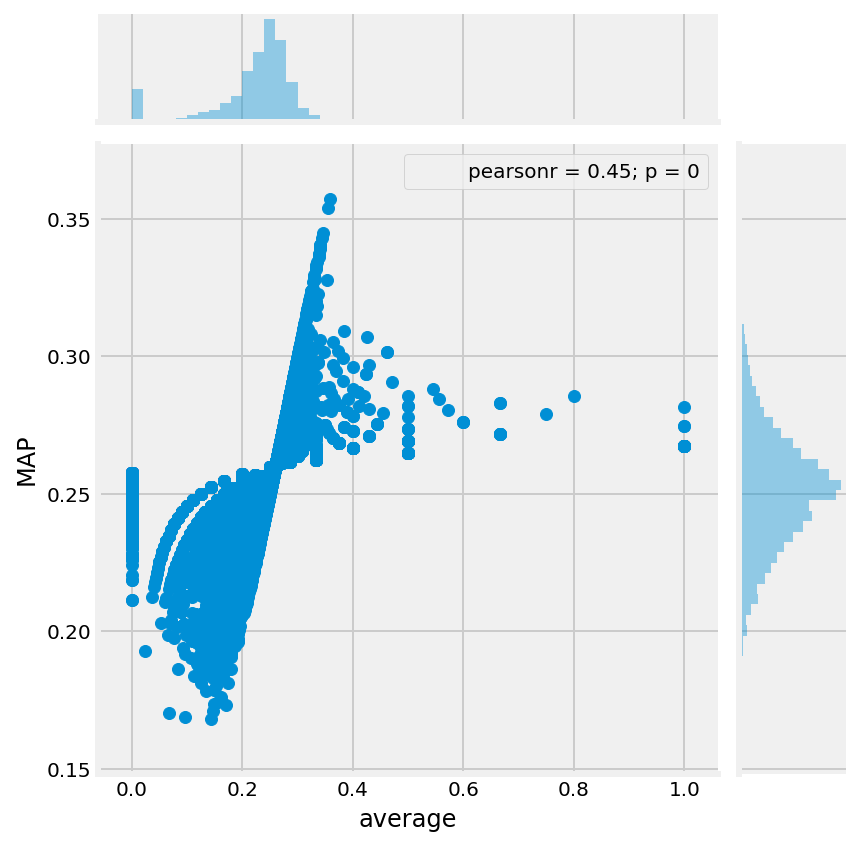

In [11]:
sns.jointplot('average', 'MAP', data=hits)